## Assignment 10
### Part 10.1

In [64]:
import re
import numpy as np

In [65]:
# 10.1.a
def tokenize(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    tokens = sentence.split() 
    return tokens

# 10.1.b

def ngram(tokens, n):
    ngrams = []
    num_tokens = len(tokens)
    
    for i in range(num_tokens - n + 1):
        ngram = tokens[i:i+n]
        ngrams.append(ngram)
    
    return ngrams

# 10.1.c

def one_hot_encode(tokens, num_words):
    token_index = {}
    token_set = list(set(tokens))
    print(token_set)
    for x in range(len(token_set)):
        token_index[token_set[x]] = x

    vector_map = []
    for token in tokens:
        arr = list(np.zeros(len(token_set), dtype = int))
        arr[token_index[token]] = 1
        vector_map.append(arr)
    results = vector_map  
    return results

In [66]:
sentence = "The quick brown fox jumps over the lazy dog! Wow, what a sight."
sent_tok = tokenize(sentence)
print(sent_tok)

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'wow', 'what', 'a', 'sight']


In [67]:
print(ngram(sent_tok, 2))

[['the', 'quick'], ['quick', 'brown'], ['brown', 'fox'], ['fox', 'jumps'], ['jumps', 'over'], ['over', 'the'], ['the', 'lazy'], ['lazy', 'dog'], ['dog', 'wow'], ['wow', 'what'], ['what', 'a'], ['a', 'sight']]


In [68]:
one_hot_encode(sent_tok, len(sent_tok))

['brown', 'quick', 'dog', 'what', 'over', 'jumps', 'fox', 'a', 'the', 'wow', 'sight', 'lazy']


[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

### Part 10.2

In [69]:
import pandas as pd
import glob
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt

data_path = "../../../data/external/imdb/aclImdb/"

In [70]:
def get_df_from_folder(filepath):
    rows = []
    for file_path in glob.glob(filepath + '/*.txt'):
        with open(file_path, 'r') as file:
            content = file.read()
            rows.append(content)
    return pd.DataFrame({'review_text': rows})

In [71]:
pos_train_df = get_df_from_folder(data_path + "train/pos")
pos_train_df["sentiment"] = 1
pos_train_df

,review_text,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
12495,"Seeing as the vote average was pretty low, and...",1
12496,"The plot had some wretched, unbelievable twist...",1
12497,I am amazed at how this movie(and most others ...,1
12498,A Christmas Together actually came before my t...,1


In [72]:
neg_train_df = get_df_from_folder(data_path + "train/neg")
neg_train_df["sentiment"] = 0
neg_train_df

,review_text,sentiment
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
12495,"Towards the end of the movie, I felt it was to...",0
12496,This is the kind of movie that my enemies cont...,0
12497,I saw 'Descent' last night at the Stockholm Fi...,0
12498,Some films that you pick up for a pound turn o...,0


In [73]:
review_train_df = pd.concat([pos_train_df, neg_train_df], ignore_index=True)
review_train_df = review_train_df.sample(frac=1).reset_index(drop=True)
review_train_df.head(10)

,review_text,sentiment
0,"The main reason people still care about ""Carlt...",0
1,JAMES STEWART plays an FBI agent who began wor...,1
2,It was a saturday night and a movie called BAS...,1
3,This is not a film you can really analyse sepa...,0
4,I first saw this film during and International...,1
5,NOTE TO ALL DIRECTORS: Long is not necessarily...,0
6,This tender beautifully crafted production del...,1
7,"I thought this was a very clunky, uninvolving ...",0
8,Bad Movie - saw it at the TIFF and the movie g...,0
9,This is one really bad movie. I've racked my b...,0


In [74]:
pos_test_df = get_df_from_folder(data_path + "test/pos")
pos_test_df["sentiment"] = 1
neg_test_df = get_df_from_folder(data_path + "test/neg")
neg_test_df["sentiment"] = 0


review_test_df = pd.concat([pos_test_df, neg_test_df], ignore_index=True)
review_test_df = review_test_df.sample(frac=1).reset_index(drop=True)
review_test_df.head(10)

,review_text,sentiment
0,Hal Hartley has been likened to a modern day W...,1
1,I can't believe this terrible film was made by...,0
2,I saw this movie last night and thought it was...,1
3,"Hey all, I just wanted to give you all a few c...",0
4,The theme is controversial and the depiction o...,1
5,"This is a piece of cinematic beauty, and it sh...",1
6,Dekalog Five was an interesting viewing experi...,1
7,The retelling of a classic story is set to the...,1
8,I rented this pile of sewer waste hoping for a...,0
9,Scandinavians are pretty good at making me lau...,1


In [75]:
max_words = 100000

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(review_train_df.review_text)

X_train_seq = tokenizer.texts_to_sequences(review_train_df.review_text)
X_val_seq = tokenizer.texts_to_sequences(review_test_df.review_text)

max_sequence_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length)
len(tokenizer.word_index)

88582

In [76]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [77]:
epochs = 10
batch_size = 128

history = model.fit(X_train_pad, review_train_df.sentiment, epochs=epochs, batch_size=batch_size, validation_data=(X_val_pad, review_test_df.sentiment))

Epoch 1/10
196/196 [==============================] - 6s 27ms/step - loss: 0.4451 - accuracy: 0.7759 - val_loss: 0.3081 - val_accuracy: 0.8685
Epoch 2/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1170 - accuracy: 0.9594 - val_loss: 0.3631 - val_accuracy: 0.8530
Epoch 3/10
196/196 [==============================] - 5s 25ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.4782 - val_accuracy: 0.8497
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.6034 - val_accuracy: 0.8495
Epoch 5/10
196/196 [==============================] - 5s 27ms/step - loss: 9.1367e-05 - accuracy: 1.0000 - val_loss: 0.7552 - val_accuracy: 0.8427
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 2.5183e-06 - accuracy: 1.0000 - val_loss: 0.8281 - val_accuracy: 0.8454
Epoch 7/10
196/196 [==============================] - 5s 26ms/step - loss: 1.8985e-07 - accuracy: 1.0000 - val_loss: 0.8950 - val_accu

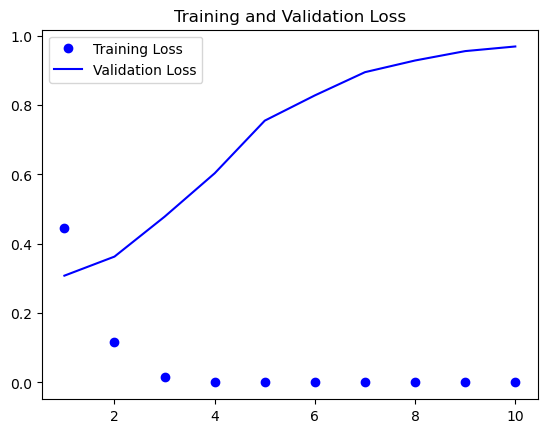

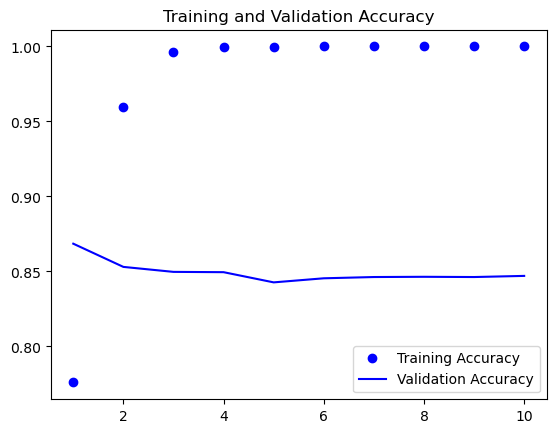

In [78]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



### 10.3

In [79]:
from tensorflow.keras.layers import LSTM

In [80]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(LSTM(64))
# model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [81]:
epochs = 10
batch_size = 128

history = model.fit(X_train_pad, review_train_df.sentiment, epochs=epochs, batch_size=batch_size, validation_data=(X_val_pad, review_test_df.sentiment))

Epoch 1/10
196/196 [==============================] - 31s 144ms/step - loss: 0.4316 - accuracy: 0.7983 - val_loss: 0.3128 - val_accuracy: 0.8683
Epoch 2/10
196/196 [==============================] - 26s 135ms/step - loss: 0.2401 - accuracy: 0.9074 - val_loss: 0.3519 - val_accuracy: 0.8497
Epoch 3/10
196/196 [==============================] - 27s 140ms/step - loss: 0.1732 - accuracy: 0.9359 - val_loss: 0.3312 - val_accuracy: 0.8634
Epoch 4/10
196/196 [==============================] - 28s 143ms/step - loss: 0.1303 - accuracy: 0.9530 - val_loss: 0.4239 - val_accuracy: 0.8642
Epoch 5/10
196/196 [==============================] - 27s 139ms/step - loss: 0.0989 - accuracy: 0.9671 - val_loss: 0.4551 - val_accuracy: 0.8550
Epoch 6/10
196/196 [==============================] - 27s 139ms/step - loss: 0.0779 - accuracy: 0.9738 - val_loss: 0.4096 - val_accuracy: 0.8485
Epoch 7/10
196/196 [==============================] - 27s 138ms/step - loss: 0.0557 - accuracy: 0.9813 - val_loss: 0.5758 - val_ac

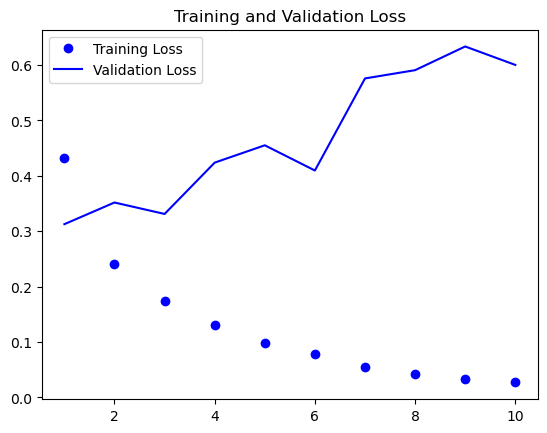

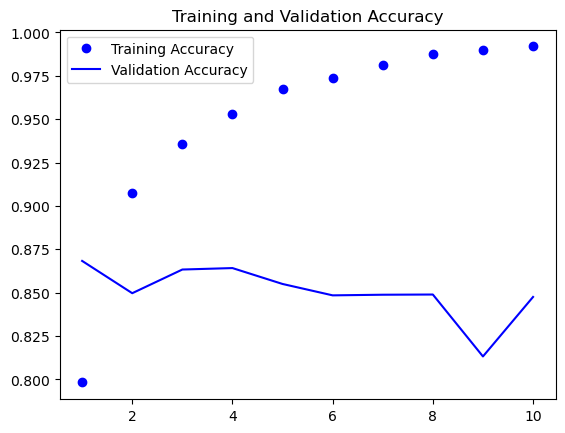

In [82]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [83]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

In [84]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [85]:
epochs = 10
batch_size = 128

history = model.fit(X_train_pad, review_train_df.sentiment, epochs=epochs, batch_size=batch_size, validation_data=(X_val_pad, review_test_df.sentiment))

Epoch 1/10
196/196 [==============================] - 7s 33ms/step - loss: 0.4767 - accuracy: 0.7754 - val_loss: 0.3167 - val_accuracy: 0.8652
Epoch 2/10
196/196 [==============================] - 6s 33ms/step - loss: 0.2365 - accuracy: 0.9066 - val_loss: 0.3305 - val_accuracy: 0.8570
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1339 - accuracy: 0.9534 - val_loss: 0.2627 - val_accuracy: 0.8926
Epoch 4/10
196/196 [==============================] - 6s 31ms/step - loss: 0.0616 - accuracy: 0.9822 - val_loss: 0.2738 - val_accuracy: 0.8944
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.0201 - accuracy: 0.9958 - val_loss: 0.3626 - val_accuracy: 0.8749
Epoch 6/10
196/196 [==============================] - 6s 31ms/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 0.3518 - val_accuracy: 0.8906
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4648 - val_accuracy: 0.8836

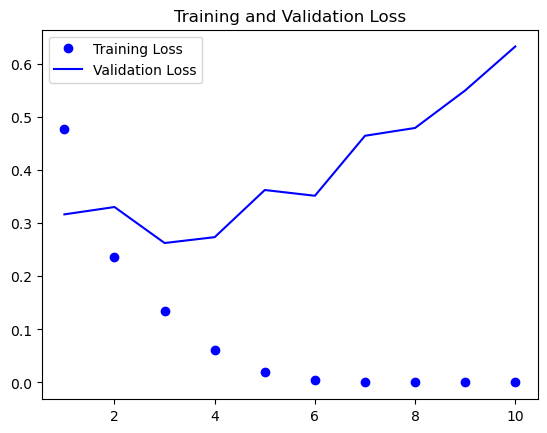

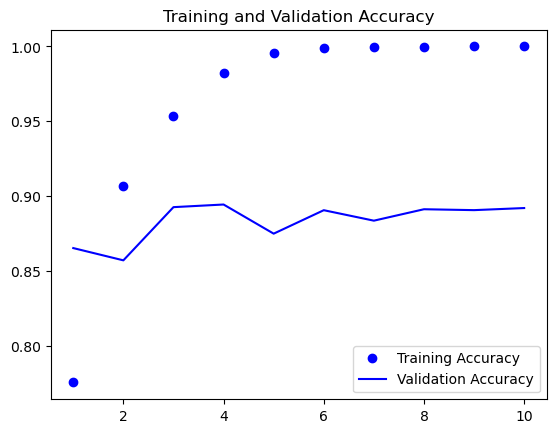

In [86]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()